In [1]:
%load_ext autoreload
%autoreload 2
from app.evaluation import print_boolean_matrix, get_accuracy_and_plot_confusion
import pandas as pd
from app.training import get_undersample_df
from app.classifier import normalize, EnsembleAllNumeric, get_text_pipeline, get_voting_classifier, DescriptionClassifier, ReadmeClassifier, NumericEnsembleClassifier, normalize, EnsembleAllNumeric, keep_useful_features
from app.constants import VALIDATION_DATA_PATH, PROCESSED_DATA_PATH
from sklearn.ensemble import VotingClassifier

In [2]:
df = get_undersample_df(pd.read_csv(PROCESSED_DATA_PATH))
df.pop("index")
df.pop("Unnamed: 0")
df = normalize(df)
y = df.pop("label")
val_df = normalize(pd.read_csv(VALIDATION_DATA_PATH))
y_val = val_df.pop("label")

In [3]:
clf = VotingClassifier(estimators=[('description', DescriptionClassifier()),
                                                     ('readme', ReadmeClassifier()),
                                                     ('ensemble', NumericEnsembleClassifier())],
                               voting='soft')
clf.fit(df, y)

VotingClassifier(estimators=[('description', <app.classifier.DescriptionClassifier object at 0x7fa34b6191d0>), ('readme', <app.classifier.ReadmeClassifier object at 0x7fa344612f90>), ('ensemble', <app.classifier.NumericEnsembleClassifier object at 0x7fa34b619490>)],
         n_jobs=1, voting='soft', weights=None)

In [4]:
predicted = clf.predict(val_df)
print_boolean_matrix(y_val, predicted)

\begin{table}[h]
\centering
\caption{Boolean Matrix}
\label{boolean_matrix}
\begin{tabular}{|r|r|r|r|r|}
 \hline
Label & Predicted Correctly & Predicted Incorrectly & Precision & Recall \\ \hline
WEB & 2 & 2 & 0.40 & 0.50 \\ \hline
DOCS & 2 & 2 & 0.50 & 0.50 \\ \hline
HW & 5 & 0 & 0.71 & 1.00 \\ \hline
DEV & 8 & 3 & 0.89 & 0.73 \\ \hline
EDU & 2 & 2 & 1.00 & 0.50 \\ \hline
DATA & 2 & 1 & 0.50 & 0.67 \\ \hline
\multicolumn{3}{|l|}{Weighted Average} & 0.72 & 0.68 \\ \hline
\end{tabular}
\end{table}


In [5]:
print list(y_val)
print predicted

['HW', 'HW', 'EDU', 'EDU', 'DEV', 'WEB', 'EDU', 'DOCS', 'DOCS', 'DATA', 'DEV', 'HW', 'DEV', 'DEV', 'HW', 'DEV', 'DOCS', 'DEV', 'EDU', 'DEV', 'DEV', 'WEB', 'HW', 'DATA', 'DATA', 'WEB', 'DEV', 'DEV', 'WEB', 'DEV', 'DOCS']
['HW' 'HW' 'EDU' 'EDU' 'DEV' 'WEB' 'DEV' 'WEB' 'DOCS' 'DOCS' 'DEV' 'HW'
 'DEV' 'DEV' 'HW' 'DEV' 'DOCS' 'DEV' 'WEB' 'DEV' 'DEV' 'WEB' 'HW' 'DATA'
 'DATA' 'DATA' 'DATA' 'WEB' 'HW' 'DOCS' 'HW']


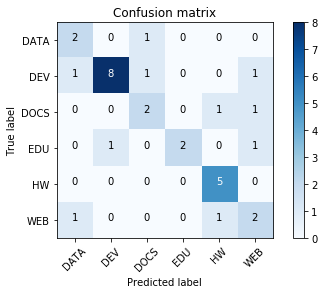

0.67741935483870963

In [6]:
get_accuracy_and_plot_confusion(y_val, predicted, clf.classes_)

In [12]:
val_df = pd.read_csv(VALIDATION_DATA_PATH)
val_df["predicted"] = predicted
val_df[["repository", "label", "predicted", "stargazers"]]

,repository,label,predicted,stargazers
0,ga-chicago/wdi5-homework,HW,HW,0.0
1,Aggregates/MI_HW2,HW,HW,0.0
2,datasciencelabs/2016,EDU,EDU,38.0
3,githubteacher/intro-november-2015,EDU,EDU,13.0
4,atom/atom,DEV,DEV,31999.0
5,jmcglone/jmcglone.github.io,WEB,WEB,69.0
6,hpi-swt2-exercise/java-tdd-challenge,EDU,DEV,1.0
7,alphagov/performanceplatform-documentation,DOCS,WEB,5.0
8,harvesthq/how-to-walkabout,DOCS,DOCS,64.0
9,vhf/free-programming-books,DATA,DOCS,69085.0
